In [177]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime as dt


import plotly.express as px
import plotly.graph_objects as go


import itertools

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None) 
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.set_option('display.expand_frame_repr', False)

In [178]:

data = pd.read_csv('files/dataset.csv')


In [179]:
df=data.copy()
df

date   0   1   2   3   4   5   6  OT
0       1990/1/1 0:00   1   2   1   1   0   0   1 NaN
1       1990/1/2 0:00   1   2   1   1   0   0   1 NaN
2       1990/1/3 0:00   1   2   1   1   0   0   1 NaN
3       1990/1/4 0:00   1   2   1   1   0   0   1 NaN
4       1990/1/5 0:00   1   2   1   1 NaN   0   1 NaN
5       1990/1/6 0:00   1   2   1   1 NaN   0   1 NaN
6       1990/1/7 0:00   1   2   1   1 NaN   0   1 NaN
7       1990/1/8 0:00   1   2   1   1 NaN   0   1 NaN
8       1990/1/9 0:00   1   2   1   1 NaN   0   1 NaN
9      1990/1/10 0:00   1   2   1   1 NaN   0   1 NaN
10     1990/1/11 0:00   1   2   1   1 NaN   0   1 NaN
11     1990/1/12 0:00   1   2   1   1 NaN   0   1 NaN
12     1990/1/13 0:00   1   2   1   1 NaN   0   1 NaN
13     1990/1/14 0:00   1   2   1   1 NaN   0   1 NaN
14     1990/1/15 0:00   1   2 NaN   1 NaN   0   1 NaN
15     1990/1/16 0:00   1   2 NaN   1 NaN   0   1 NaN
16     1990/1/17 0:00   1 NaN NaN   1 NaN   0   1 NaN
17     1990/1/18 0:00   1 NaN NaN   1 NaN   0   1 NaN
18     1990/1/19 0:00   1 NaN NaN   1 NaN   0   1   1
19     1990/1/20 0:00 NaN NaN NaN   1 NaN   0   1   1
20     1990/1/21 0:00 NaN NaN NaN   1 NaN   0   1   1
21     1990/1/22 0:00 NaN NaN NaN   1   0 NaN   1   1
22     1990/1/23 0:00 NaN NaN NaN   1   0 NaN   1   1
23     1990/1/24 0:00 NaN NaN NaN   1   0 NaN   1   1
24     1990/1/25 0:00 NaN NaN NaN   1   0 NaN   1   1
25     1990/1/26 0:00 NaN NaN NaN   1   0 NaN   1   1
26     1990/1/27 0:00 NaN NaN NaN   1   0 NaN   1   1
27     1990/1/28 0:00 NaN NaN NaN   1   0 NaN   1   1
28     1990/1/29 0:00 NaN NaN NaN   1   0 NaN   1 NaN
29     1990/1/30 0:00 NaN NaN NaN   1   0 NaN   1 NaN
30     1990/1/31 0:00 NaN NaN NaN   1   0 NaN   1 NaN
31      1990/2/1 0:00 NaN NaN   1   1   0 NaN   1 NaN
32      1990/2/2 0:00 NaN NaN   1   1   0 NaN   1 NaN
33      1990/2/3 0:00 NaN NaN   1   1   0 NaN   1 NaN
34      1990/2/4 0:00 NaN NaN   1   1   0 NaN   1 NaN
35      1990/2/5 0:00 NaN NaN   1   1   0 NaN   1 NaN
36      1990/2/6 0:00 NaN NaN   1   1   0 NaN   1 NaN
37      1990/2/7 0:00 NaN NaN   1   1   0 NaN   1 NaN
38      1990/2/8 0:00 NaN NaN   1   1 NaN NaN   1 NaN
39      1990/2/9 0:00 NaN NaN   1   1 NaN NaN   1 NaN
40     1990/2/10 0:00 NaN NaN   1   1   0 NaN   1 NaN
41     1990/2/11 0:00 NaN NaN   1   1   0 NaN   1 NaN
42     1990/2/12 0:00 NaN NaN   1   1   0 NaN   1 NaN
43     1990/2/13 0:00 NaN NaN   1   1   0 NaN   1 NaN
44     1990/2/14 0:00 NaN NaN   1   1   0 NaN   1 NaN
45     1990/2/15 0:00 NaN NaN   1   1   0 NaN   1 NaN
46     1990/2/16 0:00 NaN NaN   1   1   0 NaN   1 NaN
47     1990/2/17 0:00 NaN NaN   1 NaN   0   0   1 NaN
48     1990/2/18 0:00 NaN NaN   1 NaN   0   0   1 NaN
49     1990/2/19 0:00 NaN NaN   1 NaN NaN   0   1 NaN
50     1990/2/20 0:00 NaN NaN   1 NaN NaN   0   1 NaN
51     1990/2/21 0:00 NaN NaN   1 NaN NaN   0   1 NaN
52     1990/2/22 0:00 NaN NaN   1 NaN NaN   0   1 NaN
53     1990/2/23 0:00 NaN NaN   1 NaN NaN   0   1 NaN
54     1990/2/24 0:00 NaN NaN   1 NaN NaN   0   1 NaN
55     1990/2/25 0:00 NaN NaN   1 NaN NaN   0   1 NaN
56     1990/2/26 0:00 NaN NaN   1 NaN NaN   0   1 NaN
57     1990/2/27 0:00 NaN NaN   1 NaN NaN   0   1   1
58     1990/2/28 0:00 NaN NaN   1   1 NaN   0   1   1
59      1990/3/1 0:00 NaN NaN   1   1 NaN   0   1   1
60      1990/3/2 0:00 NaN NaN   1   1 NaN   0   1   1
61      1990/3/3 0:00 NaN NaN   1 NaN NaN   0   1   1
62      1990/3/4 0:00 NaN NaN   1 NaN NaN   0   1   1
63      1990/3/5 0:00 NaN NaN   1 NaN NaN   0   1   1
64      1990/3/6 0:00 NaN   2   1 NaN   0   0   1   1
65      1990/3/7 0:00 NaN   2   1 NaN   0   0   1   1
66      1990/3/8 0:00 NaN   2   1 NaN   0   0   1   1
67      1990/3/9 0:00 NaN   2   1 NaN   0   0   1   1
68     1990/3/10 0:00 NaN   2   1 NaN   0   0   1   1
69     1990/3/11 0:00 NaN   2   1 NaN   0   0   1 NaN
70     1990/3/12 0:00 NaN   2   1 NaN NaN   0   1 NaN
71     1990/3/13 0:00 NaN   2   1 NaN NaN   0   1 NaN
72     1990/3/14 0:00 NaN   2   1 NaN NaN   0   1 NaN
73     1990/3/15 0:00

# Overview of our dataset 
This function is highly valuable for comprehending the overall structure of the dataset. It offers access to various information, including the dataset’s dimensions, feature names, data types, and the ability to review the first and last 5 rows of the dataset. Furthermore, I aim to uncover valuable patterns and trends within the dataset by analyzing the statistical properties of numerical variables



In [180]:
def check_df(dataset, head = 5):
    print('#'*30 + ' Shape of Dataset' + '#'*30, end = '\n'*2)
    print(dataset.shape, end = '\n'*2)
    print('#'*30 + ' General informations about our Dataset' + '#'*30, end = '\n'*2)
    print(dataset.info(), end = '\n'*2)
    print('#'*30 + ' First 5 Lines Of Dataset' + '#'*30, end = '\n'*2)
    print(dataset.head(head), end = '\n'*2)
    print('#'*30 + ' NaN values of Features' + '#'*30, end = '\n'*2)
    print(dataset.isnull().sum(), end = '\n'*2)
    print('#'*30 + ' Descriptive Statistics of Numerical Features' + '#'*30, end = '\n'*2)
    print(dataset.describe().T, end = '\n'*2)
    print('#'*30 + ' Quantiles of Numerical Features' + '#'*30, end ='\n'*2)
    print(dataset.describe([0,0.10, 0.25, 0.50,0.75,0.99]).T, end = '\n'*2)

check_df(df)

############################## Shape of Dataset##############################

(7488, 9)

############################## General informations about our Dataset##############################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7488 non-null   object 
 1   0       3331 non-null   float64
 2   1       3313 non-null   float64
 3   2       3327 non-null   float64
 4   3       3326 non-null   float64
 5   4       3466 non-null   float64
 6   5       3392 non-null   float64
 7   6       3191 non-null   float64
 8   OT      3257 non-null   float64
dtypes: float64(8), object(1)
memory usage: 526.6+ KB
None

############################## First 5 Lines Of Dataset##############################

            date  0  1  2  3   4  5  6  OT
0  1990/1/1 0:00  1  2  1  1   0  0  1 NaN
1  1990/1/2 0:00  1  2  1  1   0  0  1 NaN
2  1990/1/3 0:00  1 

In [181]:
df["date"] = pd.to_datetime(df["date"], errors = 'coerce')


# Convert into date format
As the datas are distributed daily ( granularity= 1day) we don't need to precise the hour

In [182]:
df

date   0   1   2   3   4   5   6  OT
0    1990-01-01   1   2   1   1   0   0   1 NaN
1    1990-01-02   1   2   1   1   0   0   1 NaN
2    1990-01-03   1   2   1   1   0   0   1 NaN
3    1990-01-04   1   2   1   1   0   0   1 NaN
4    1990-01-05   1   2   1   1 NaN   0   1 NaN
5    1990-01-06   1   2   1   1 NaN   0   1 NaN
6    1990-01-07   1   2   1   1 NaN   0   1 NaN
7    1990-01-08   1   2   1   1 NaN   0   1 NaN
8    1990-01-09   1   2   1   1 NaN   0   1 NaN
9    1990-01-10   1   2   1   1 NaN   0   1 NaN
10   1990-01-11   1   2   1   1 NaN   0   1 NaN
11   1990-01-12   1   2   1   1 NaN   0   1 NaN
12   1990-01-13   1   2   1   1 NaN   0   1 NaN
13   1990-01-14   1   2   1   1 NaN   0   1 NaN
14   1990-01-15   1   2 NaN   1 NaN   0   1 NaN
15   1990-01-16   1   2 NaN   1 NaN   0   1 NaN
16   1990-01-17   1 NaN NaN   1 NaN   0   1 NaN
17   1990-01-18   1 NaN NaN   1 NaN   0   1 NaN
18   1990-01-19   1 NaN NaN   1 NaN   0   1   1
19   1990-01-20 NaN NaN NaN   1 NaN   0   1   1
20   1990-01-21 NaN NaN NaN   1 NaN   0   1   1
21   1990-01-22 NaN NaN NaN   1   0 NaN   1   1
22   1990-01-23 NaN NaN NaN   1   0 NaN   1   1
23   1990-01-24 NaN NaN NaN   1   0 NaN   1   1
24   1990-01-25 NaN NaN NaN   1   0 NaN   1   1
25   1990-01-26 NaN NaN NaN   1   0 NaN   1   1
26   1990-01-27 NaN NaN NaN   1   0 NaN   1   1
27   1990-01-28 NaN NaN NaN   1   0 NaN   1   1
28   1990-01-29 NaN NaN NaN   1   0 NaN   1 NaN
29   1990-01-30 NaN NaN NaN   1   0 NaN   1 NaN
30   1990-01-31 NaN NaN NaN   1   0 NaN   1 NaN
31   1990-02-01 NaN NaN   1   1   0 NaN   1 NaN
32   1990-02-02 NaN NaN   1   1   0 NaN   1 NaN
33   1990-02-03 NaN NaN   1   1   0 NaN   1 NaN
34   1990-02-04 NaN NaN   1   1   0 NaN   1 NaN
35   1990-02-05 NaN NaN   1   1   0 NaN   1 NaN
36   1990-02-06 NaN NaN   1   1   0 NaN   1 NaN
37   1990-02-07 NaN NaN   1   1   0 NaN   1 NaN
38   1990-02-08 NaN NaN   1   1 NaN NaN   1 NaN
39   1990-02-09 NaN NaN   1   1 NaN NaN   1 NaN
40   1990-02-10 NaN NaN   1   1   0 NaN   1 NaN
41   1990-02-11 NaN NaN   1   1   0 NaN   1 NaN
42   1990-02-12 NaN NaN   1   1   0 NaN   1 NaN
43   1990-02-13 NaN NaN   1   1   0 NaN   1 NaN
44   1990-02-14 NaN NaN   1   1   0 NaN   1 NaN
45   1990-02-15 NaN NaN   1   1   0 NaN   1 NaN
46   1990-02-16 NaN NaN   1   1   0 NaN   1 NaN
47   1990-02-17 NaN NaN   1 NaN   0   0   1 NaN
48   1990-02-18 NaN NaN   1 NaN   0   0   1 NaN
49   1990-02-19 NaN NaN   1 NaN NaN   0   1 NaN
50   1990-02-20 NaN NaN   1 NaN NaN   0   1 NaN
51   1990-02-21 NaN NaN   1 NaN NaN   0   1 NaN
52   1990-02-22 NaN NaN   1 NaN NaN   0   1 NaN
53   1990-02-23 NaN NaN   1 NaN NaN   0   1 NaN
54   1990-02-24 NaN NaN   1 NaN NaN   0   1 NaN
55   1990-02-25 NaN NaN   1 NaN NaN   0   1 NaN
56   1990-02-26 NaN NaN   1 NaN NaN   0   1 NaN
57   1990-02-27 NaN NaN   1 NaN NaN   0   1   1
58   1990-02-28 NaN NaN   1   1 NaN   0   1   1
59   1990-03-01 NaN NaN   1   1 NaN   0   1   1
60   1990-03-02 NaN NaN   1   1 NaN   0   1   1
61   1990-03-03 NaN NaN   1 NaN NaN   0   1   1
62   1990-03-04 NaN NaN   1 NaN NaN   0   1   1
63   1990-03-05 NaN NaN   1 NaN NaN   0   1   1
64   1990-03-06 NaN   2   1 NaN   0   0   1   1
65   1990-03-07 NaN   2   1 NaN   0   0   1   1
66   1990-03-08 NaN   2   1 NaN   0   0   1   1
67   1990-03-09 NaN   2   1 NaN   0   0   1   1
68   1990-03-10 NaN   2   1 NaN   0   0   1   1
69   1990-03-11 NaN   2   1 NaN   0   0   1 NaN
70   1990-03-12 NaN   2   1 NaN NaN   0   1 NaN
71   1990-03-13 NaN   2   1 NaN NaN   0   1 NaN
72   1990-03-14 NaN   2   1 NaN NaN   0   1 NaN
73   1990-03-15 NaN   2   1 NaN NaN NaN   1 NaN
74   1990-03-16 NaN   2   1 NaN NaN NaN   1 NaN
75   1990-03-17 NaN   2   1 NaN NaN NaN   1 NaN
76   1990-03-18 NaN   2   1 NaN NaN NaN   1 NaN
77   1990-03-19 NaN   2   1 NaN NaN NaN   1 NaN
78   1990-03-20 NaN   2   1 NaN NaN NaN   1 NaN
79   1990-03-21 NaN   2   1 NaN NaN NaN   1   1
80   1990-03-22 NaN   2   1 NaN NaN NaN   1   1
81   1990-03-23 NaN   2   1   1   0 NaN   1   1
82   1990-03-24 NaN   2   1

# Filling the missing value with forward fill 
Applying both forward fill and backward fill to the "OT" column, or any time series data column, is not a common practice, but it can be considered in specific circumstances. The goal of handling missing values in time series data is to preserve the temporal integrity and continuity of the data as much as possible.


In [183]:
# Apply forward fill to handle missing values in all columns except the date column
df["OT"] = df["OT"].fillna(method='bfill')

df_filled = df.fillna(method='ffill')

# Since forward fill might leave initial missing values in some columns, apply backward fill to the "OT" column
df_filled["OT"] = df_filled["OT"].fillna(method='bfill')

# Verify the operation by checking for remaining missing values
remaining_missing_final = df_filled.isnull().sum()

# Display the summary of remaining missing values
print(remaining_missing_final)

date    0
0       0
1       0
2       0
3       0
4       0
5       0
6       0
OT      0
dtype: int64


In [184]:
df_filled

date  0  1  2  3  4  5  6  OT
0    1990-01-01  1  2  1  1  0  0  1   1
1    1990-01-02  1  2  1  1  0  0  1   1
2    1990-01-03  1  2  1  1  0  0  1   1
3    1990-01-04  1  2  1  1  0  0  1   1
4    1990-01-05  1  2  1  1  0  0  1   1
5    1990-01-06  1  2  1  1  0  0  1   1
6    1990-01-07  1  2  1  1  0  0  1   1
7    1990-01-08  1  2  1  1  0  0  1   1
8    1990-01-09  1  2  1  1  0  0  1   1
9    1990-01-10  1  2  1  1  0  0  1   1
10   1990-01-11  1  2  1  1  0  0  1   1
11   1990-01-12  1  2  1  1  0  0  1   1
12   1990-01-13  1  2  1  1  0  0  1   1
13   1990-01-14  1  2  1  1  0  0  1   1
14   1990-01-15  1  2  1  1  0  0  1   1
15   1990-01-16  1  2  1  1  0  0  1   1
16   1990-01-17  1  2  1  1  0  0  1   1
17   1990-01-18  1  2  1  1  0  0  1   1
18   1990-01-19  1  2  1  1  0  0  1   1
19   1990-01-20  1  2  1  1  0  0  1   1
20   1990-01-21  1  2  1  1  0  0  1   1
21   1990-01-22  1  2  1  1  0  0  1   1
22   1990-01-23  1  2  1  1  0  0  1   1
23   1990-01-24  1  2  1  1  0  0  1   1
24   1990-01-25  1  2  1  1  0  0  1   1
25   1990-01-26  1  2  1  1  0  0  1   1
26   1990-01-27  1  2  1  1  0  0  1   1
27   1990-01-28  1  2  1  1  0  0  1   1
28   1990-01-29  1  2  1  1  0  0  1   1
29   1990-01-30  1  2  1  1  0  0  1   1
30   1990-01-31  1  2  1  1  0  0  1   1
31   1990-02-01  1  2  1  1  0  0  1   1
32   1990-02-02  1  2  1  1  0  0  1   1
33   1990-02-03  1  2  1  1  0  0  1   1
34   1990-02-04  1  2  1  1  0  0  1   1
35   1990-02-05  1  2  1  1  0  0  1   1
36   1990-02-06  1  2  1  1  0  0  1   1
37   1990-02-07  1  2  1  1  0  0  1   1
38   1990-02-08  1  2  1  1  0  0  1   1
39   1990-02-09  1  2  1  1  0  0  1   1
40   1990-02-10  1  2  1  1  0  0  1   1
41   1990-02-11  1  2  1  1  0  0  1   1
42   1990-02-12  1  2  1  1  0  0  1   1
43   1990-02-13  1  2  1  1  0  0  1   1
44   1990-02-14  1  2  1  1  0  0  1   1
45   1990-02-15  1  2  1  1  0  0  1   1
46   1990-02-16  1  2  1  1  0  0  1   1
47   1990-02-17  1  2  1  1  0  0  1   1
48   1990-02-18  1  2  1  1  0  0  1   1
49   1990-02-19  1  2  1  1  0  0  1   1
50   1990-02-20  1  2  1  1  0  0  1   1
51   1990-02-21  1  2  1  1  0  0  1   1
52   1990-02-22  1  2  1  1  0  0  1   1
53   1990-02-23  1  2  1  1  0  0  1   1
54   1990-02-24  1  2  1  1  0  0  1   1
55   1990-02-25  1  2  1  1  0  0  1   1
56   1990-02-26  1  2  1  1  0  0  1   1
57   1990-02-27  1  2  1  1  0  0  1   1
58   1990-02-28  1  2  1  1  0  0  1   1
59   1990-03-01  1  2  1  1  0  0  1   1
60   1990-03-02  1  2  1  1  0  0  1   1
61   1990-03-03  1  2  1  1  0  0  1   1
62   1990-03-04  1  2  1  1  0  0  1   1
63   1990-03-05  1  2  1  1  0  0  1   1
64   1990-03-06  1  2  1  1  0  0  1   1
65   1990-03-07  1  2  1  1  0  0  1   1
66   1990-03-08  1  2  1  1  0  0  1   1
67   1990-03-09  1  2  1  1  0  0  1   1
68   1990-03-10  1  2  1  1  0  0  1   1
69   1990-03-11  1  2  1  1  0  0  1   1
70   1990-03-12  1  2  1  1  0  0  1   1
71   1990-03-13  1  2  1  1  0  0  1   1
72   1990-03-14  1  2  1  1  0  0  1   1
73   1990-03-15  1  2  1  1  0  0  1   1
74   1990-03-16  1  2  1  1  0  0  1   1
75   1990-03-17  1  2  1  1  0  0  1   1
76   1990-03-18  1  2  1  1  0  0  1   1
77   1990-03-19  1  2  1  1  0  0  1   1
78   1990-03-20  1  2  1  1  0  0  1   1
79   1990-03-21  1  2  1  1  0  0  1   1
80   1990-03-22  1  2  1  1  0  0  1   1
81   1990-03-23  1  2  1  1  0  0  1   1
82   1990-03-24  1  2  1  1  0  0  1   1
83   1990-03-25  1  2  1  1  0  0  1   1
84   1990-03-26  1  2  1  1  0  0  1   1
85   1990-03-27  1  2  1  1  0  0  1   1
86   1990-03-28  1  2  1  1  0  0  1   1
87   1990-03-29  1  2  1  1  0  0  1   1
88   1990-03-30  1  2  1  1  0  0  1   1
89   1990-03-31  1  2  1  1  0  0  1   1
90   1990-04-01  1  2  1  1  0  0  1   1
91   1990-04-02  1  2  1  1  0  0  1   1
92   1990-04-03  1  2  1  1  0  0  1   1
93   1990-04-04  1  2  1  1  0  0  1   1
94   1990-04-05  1  2  1  1  0  0  1   1
95   1990-04-06  1  2  1  1  0  0  1   1
96   1990-04-07  1  2  1  1  0  0 

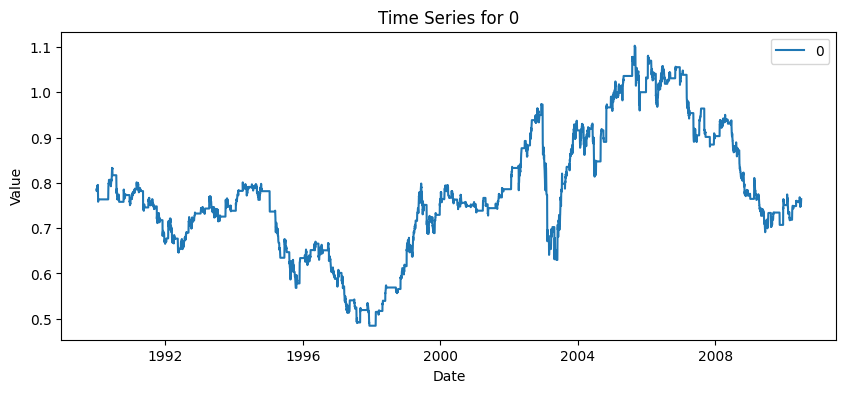

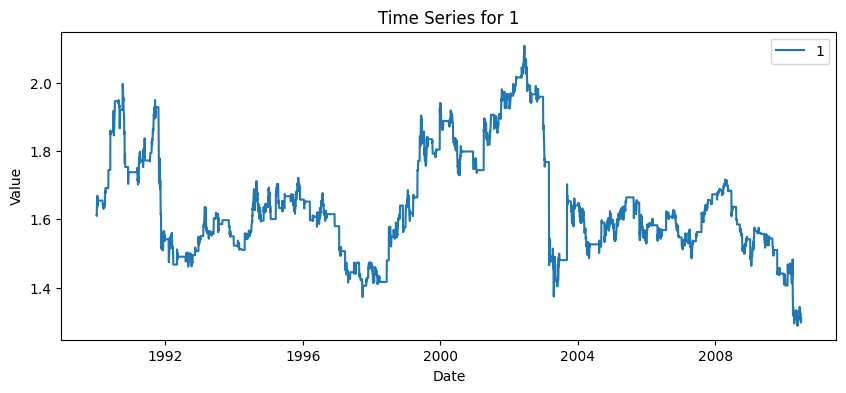

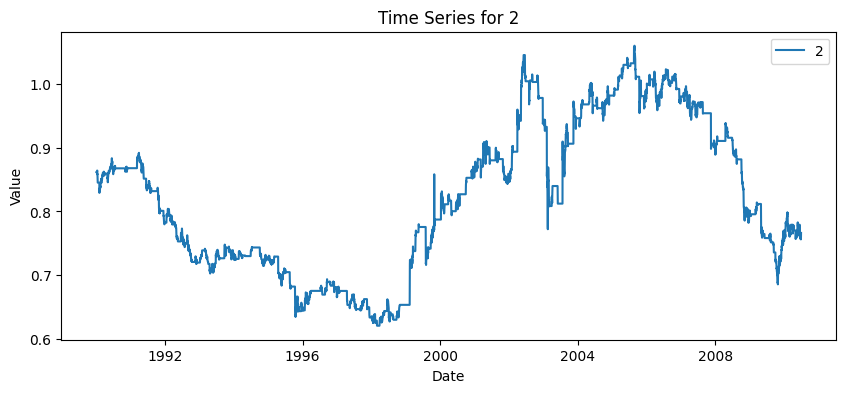

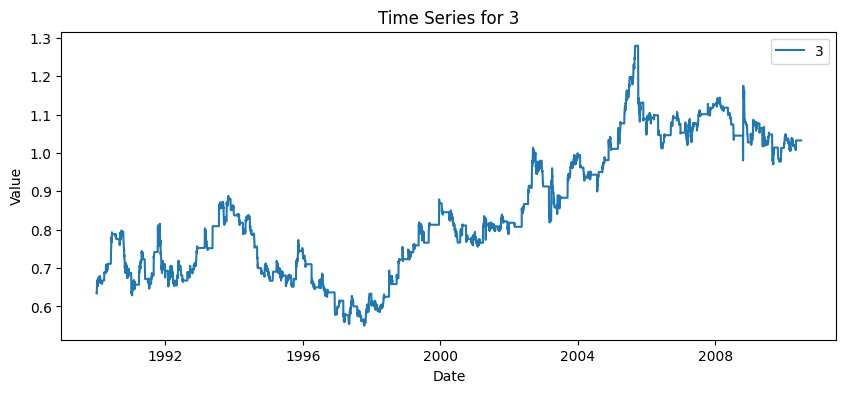

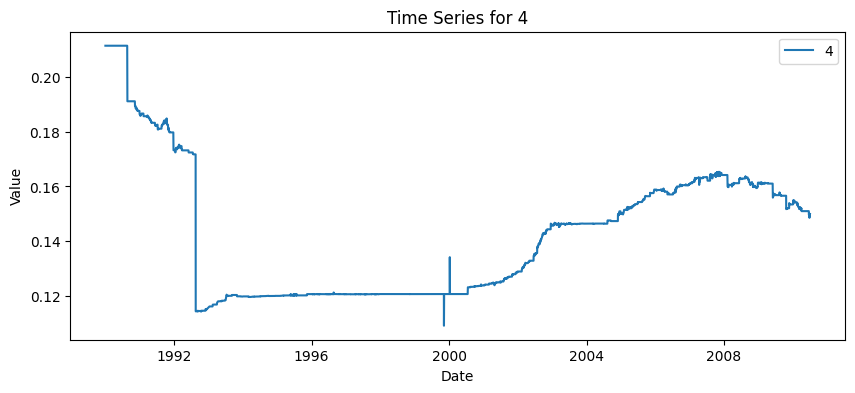

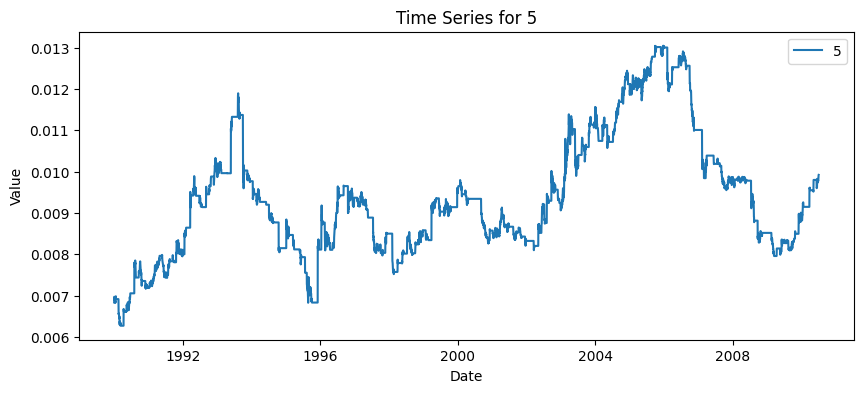

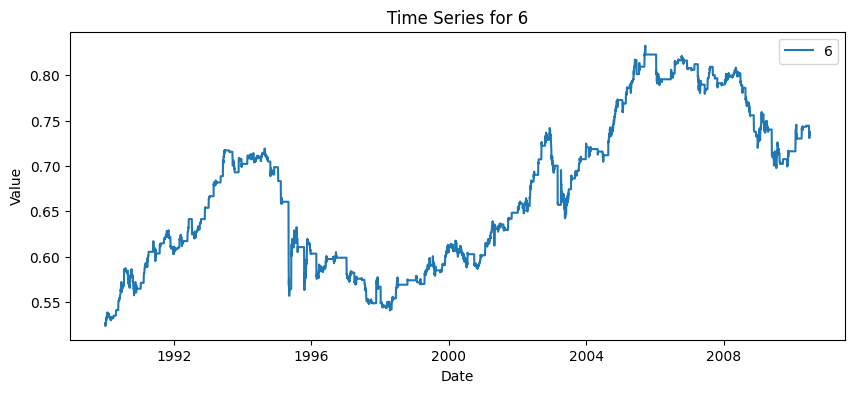

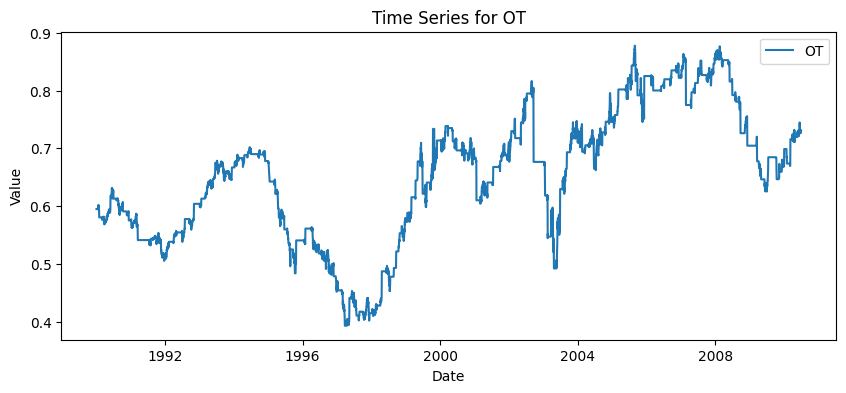

In [185]:
# Assuming 'data_filled_all' is your DataFrame and has been properly prepared

for column in df_filled.columns[1:]:  # Skipping the 'date' column
    plt.figure(figsize=(10, 4))
    plt.plot(df_filled['date'], df_filled[column], label=column)
    plt.title(f"Time Series for {column}")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


In [186]:
df_filled.describe()

date    0    1    2    3    4    5    6   OT
count                 7488 7488 7488 7488 7488 7488 7488 7488 7488
mean   2000-04-01 12:00:00    1    2    1    1    0    0    1    1
min    1990-01-01 00:00:00    0    1    1    1    0    0    1    0
25%    1995-02-15 18:00:00    1    2    1    1    0    0    1    1
50%    2000-04-01 12:00:00    1    2    1    1    0    0    1    1
75%    2005-05-17 06:00:00    1    2    1    1    0    0    1    1
max    2010-07-02 00:00:00    1    2    1    1    0    0    1    1
std                    NaN    0    0    0    0    0    0    0    0

# Feature Selection/Engineering:
We are choosing the features that are most likely to influence the target variable based on domain knowledge or feature importance analysis.


In [187]:
df_filled.drop("4", axis=1, inplace=True)
